In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Params
sample_n = 32

# Paths
root = '/media/latlab/MR/projects/kaggle-ubc-ocean'
data_dir = os.path.join(root, 'data')
results_dir = os.path.join(root, 'results')
train_csv = 'train.csv'
train_image_dir = os.path.join(data_dir, 'train_images')
train_thumbnail_dir = os.path.join(data_dir, 'train_thumbnails')
tile_set_name = 'train_tiles_2048_p25_drop20'
tiles_dir = os.path.join(results_dir, tile_set_name)

# Load data
df = pd.read_csv(os.path.join(data_dir, train_csv))
df

image_id label  image_width  image_height  is_tma
0           4  HGSC        23785         20008   False
1          66  LGSC        48871         48195   False
2          91  HGSC         3388          3388    True
3         281  LGSC        42309         15545   False
4         286    EC        37204         30020   False
..        ...   ...          ...           ...     ...
533     65022  LGSC        53355         46675   False
534     65094    MC        55042         45080   False
535     65300  HGSC        75860         27503   False
536     65371  HGSC        42551         41800   False
537     65533  HGSC        45190         33980   False

[538 rows x 5 columns]

In [2]:
tiles_df = pd.DataFrame(columns=['image_id', 'orig_image_id', 'label', 'is_tma'])
for i, row in df.iterrows():
    orig_image_id = row['image_id']
    try:
        image_id_list = [os.path.splitext(x)[0] for x in os.listdir(os.path.join(tiles_dir, str(orig_image_id)))]
        curr_df = pd.DataFrame({'image_id': image_id_list, 
                                'orig_image_id': orig_image_id, 
                                'label': row['label'], 
                                'orig_image_width': row['image_width'], 
                                'orig_image_height': row['image_height'], 
                                'is_tma': row['is_tma']})
        tiles_df = pd.concat((tiles_df, curr_df))
    except:
        print(f'No tiles for {orig_image_id}')
tiles_df = tiles_df.reset_index(drop=True).astype({'orig_image_width': 'int32', 'orig_image_height': 'int32'})
tiles_df

image_id orig_image_id label is_tma  orig_image_width  \
0        000089_6-8             4  HGSC  False             23785   
1        000038_3-4             4  HGSC  False             23785   
2        000031_8-3             4  HGSC  False             23785   
3        000008_9-1             4  HGSC  False             23785   
4        000066_7-6             4  HGSC  False             23785   
...             ...           ...   ...    ...               ...   
99587    000073_5-4         65533  HGSC  False             45190   
99588   000201_18-9         65533  HGSC  False             45190   
99589  000292_17-13         65533  HGSC  False             45190   
99590   000129_15-6         65533  HGSC  False             45190   
99591   000060_15-3         65533  HGSC  False             45190   

       orig_image_height  
0                  20008  
1                  20008  
2                  20008  
3                  20008  
4                  20008  
...                  ...  
99587              33980  
99588              33980  
99589              33980  
99590              33980  
99591              33980  

[99592 rows x 6 columns]

In [3]:
# Check data
tiles_df.groupby('orig_image_id')['image_id'].count().describe()

count    538.000000
mean     185.115242
std      117.527800
min        1.000000
25%       95.250000
50%      163.500000
75%      253.000000
max      587.000000
Name: image_id, dtype: float64

In [4]:
tiles_df.to_csv(os.path.join(results_dir, f'{tile_set_name}.csv'), index=False)

In [5]:
# Undersample to N tile/image
def sampler(x, n):
    if len(x) < n:
        return x
    else:
        return x.sample(n)
tiles_df_sample = tiles_df.groupby('orig_image_id').apply(lambda x: sampler(x, sample_n)).reset_index(drop=True)
tiles_df_sample.to_csv(os.path.join(results_dir, f'{tile_set_name}_sample{sample_n}.csv'), index=False)
tiles_df_sample

image_id orig_image_id label is_tma  orig_image_width  \
0       000056_9-5             4  HGSC  False             23785   
1       000037_2-4             4  HGSC  False             23785   
2       000048_1-5             4  HGSC  False             23785   
3       000090_7-8             4  HGSC  False             23785   
4       000015_4-2             4  HGSC  False             23785   
...            ...           ...   ...    ...               ...   
32101  000129_15-6         65533  HGSC  False             45190   
32102  000056_11-3         65533  HGSC  False             45190   
32103  000279_4-13         65533  HGSC  False             45190   
32104  000038_16-2         65533  HGSC  False             45190   
32105  000159_22-7         65533  HGSC  False             45190   

       orig_image_height  
0                  20008  
1                  20008  
2                  20008  
3                  20008  
4                  20008  
...                  ...  
32101              33980  
32102              33980  
32103              33980  
32104              33980  
32105              33980  

[32106 rows x 6 columns]

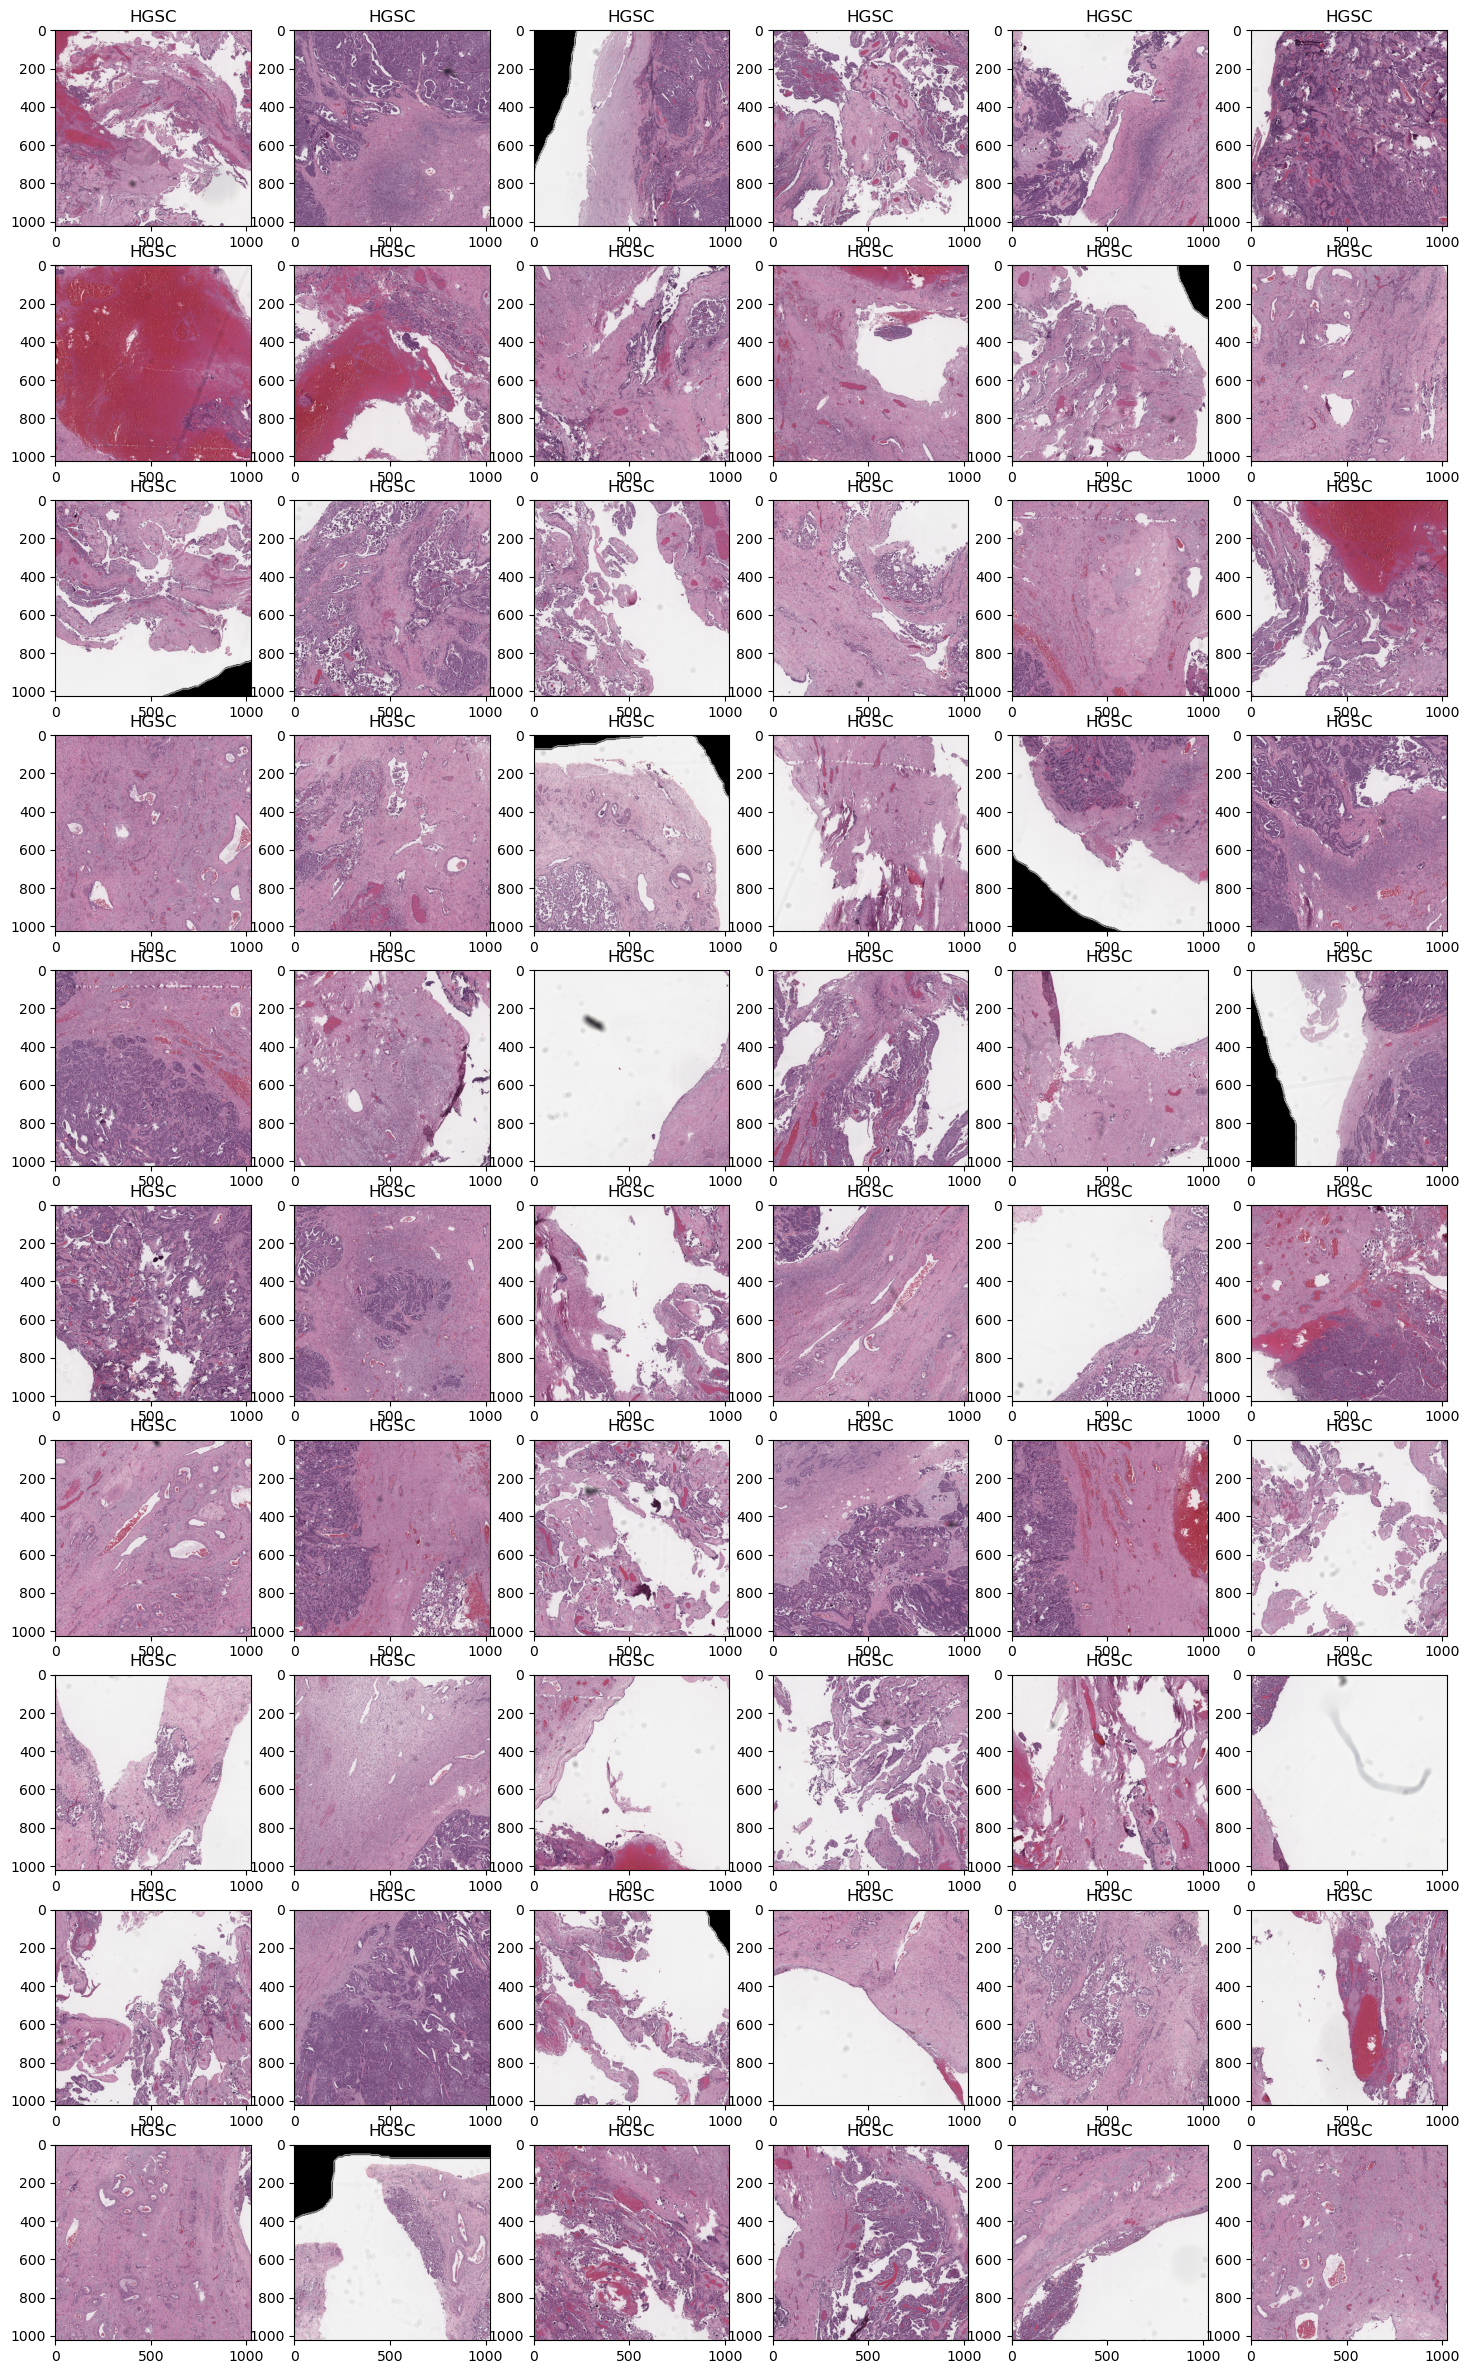

In [6]:
nrows = 10
ncols = 6
# img_color_mean = [0.8708488980328596, 0.75677901508938, 0.8545134911215124]
# img_color_std = [0.08086288591996027, 0.11553960008706814, 0.06914169213328555]
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*3))
for i, row in tiles_df_sample.iterrows():
    if i >= (nrows*ncols):
        break
    img_path = os.path.join(tiles_dir, str(row['orig_image_id']), str(row['image_id'] + '.png'))
    img = plt.imread(img_path)
    if np.max(img) > 1.5:
        img = img / 255.0
    # img -= img_color_mean
    # img /= img_color_std
    ax = axes[i // ncols, i % ncols]
    ax.set_title(row['label'])
    ax.imshow(img)